In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' and 'is_numeric_dtype' to check the string or numeric type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Scikit-learn' features various classification, regression and clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 'Pydotplus' is used for visualization 
import pydotplus
from IPython.display import Image  

# 'Graphviz' is used for visualization of decision tree
import graphviz


In [2]:
df=pd.read_csv('carInsurance_train.csv')

In [3]:
df.shape

(4000, 19)

In [4]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [14]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
    return missing_data
missing(df)                                                           

,Total,Percent
CarInsurance,0,0.0
CarLoan,0,0.0
Age,0,0.0
Job,0,0.0
Marital,0,0.0
Education,0,0.0
Default,0,0.0
Balance,0,0.0
HHInsurance,0,0.0
Communication,0,0.0


In [5]:
df['Communication']=df['Communication'].fillna(df['Communication'].mode()[0])

In [6]:
df['Job']=df.Job.fillna(method='pad')

In [7]:
df['Education']=df.Education.fillna(method='pad')

In [8]:
df.Outcome=df.Outcome.fillna('None')

In [9]:
df.dtypes
cat=['Default','HHInsurance','CarLoan']

In [10]:
for i in cat:
    df[i]=df[i].astype('int64')

In [11]:
df.CarInsurance=df.CarInsurance.astype('int')

In [12]:
df.Outcome.value_counts()

None       3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [15]:
missing(df)

,Total,Percent
CarInsurance,0,0.0
CarLoan,0,0.0
Age,0,0.0
Job,0,0.0
Marital,0,0.0
Education,0,0.0
Default,0,0.0
Balance,0,0.0
HHInsurance,0,0.0
Communication,0,0.0


In [16]:
for i in ('CallStart','CallEnd'):
    df[i]=df[i].astype('datetime64')

In [17]:
main_df=df.copy()

In [18]:
df.drop(columns=['CallEnd','CallStart'], inplace=True)

In [19]:
cat_feat=df.select_dtypes(include='object')

Text(0.5, 1.0, '% of Results')

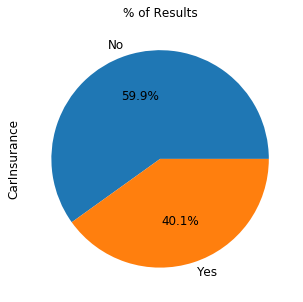

In [20]:
ax = (df['CarInsurance'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('CarInsurance',fontsize = 12)
ax.set_title('% of Results', fontsize = 12)

In [21]:
# The data is Balanced

In [57]:
dfd=df.copy()

In [23]:
cat_feat


,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,management,single,tertiary,telephone,jan,None
1,blue-collar,married,primary,cellular,may,None
2,management,single,tertiary,cellular,jun,failure
3,student,single,primary,cellular,may,None
4,management,married,tertiary,cellular,jun,None
...,...,...,...,...,...,...
3995,technician,single,tertiary,cellular,may,failure
3996,admin.,divorced,secondary,cellular,jul,None
3997,admin.,single,secondary,cellular,jul,None
3998,entrepreneur,single,tertiary,cellular,jan,failure


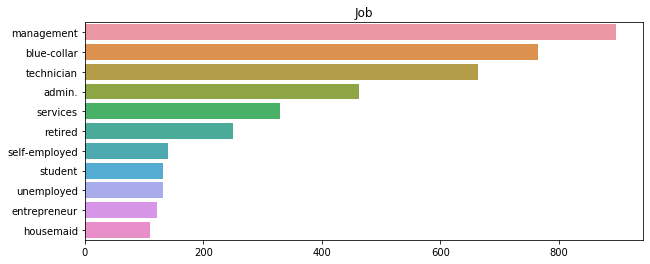

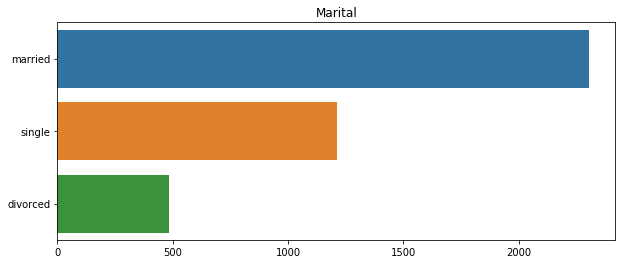

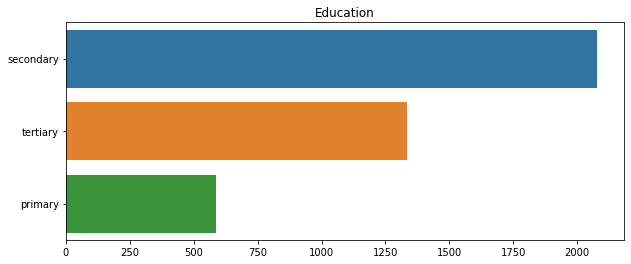

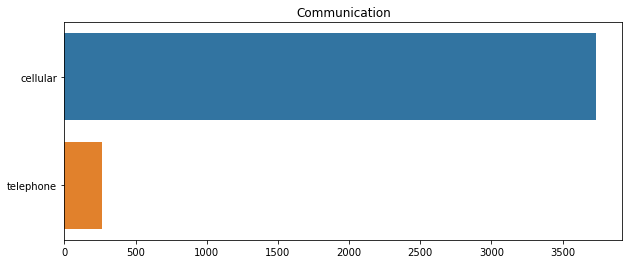

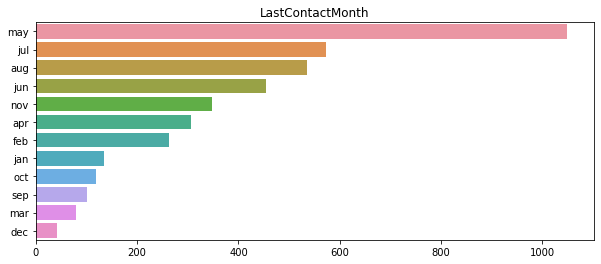

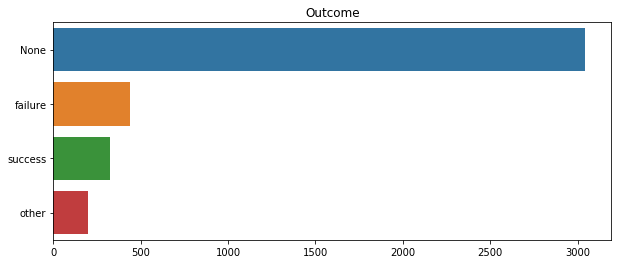

In [355]:
#Analysing Categorical Variables using seaborn
for i in cat_feat:
    plt.figure(figsize=(10,4))
    sns.barplot(df[i].value_counts().values,df[i].value_counts().index)
    plt.title(i)
    plt.tight_layout

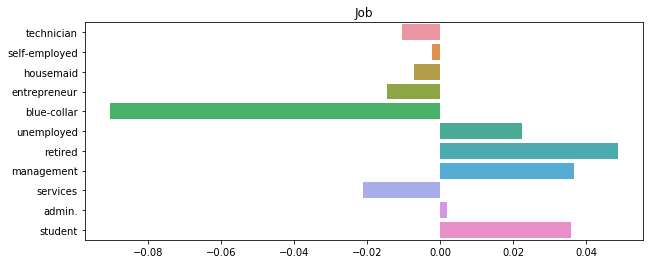

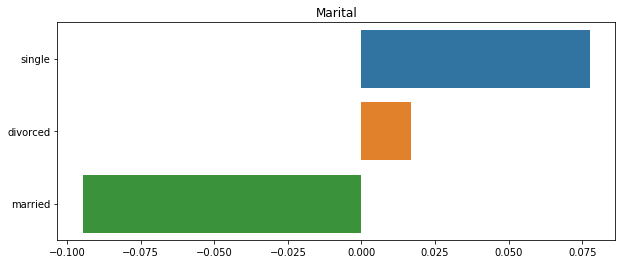

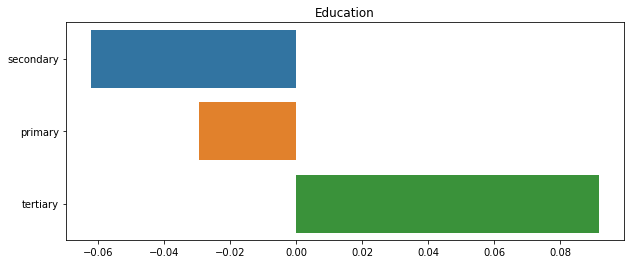

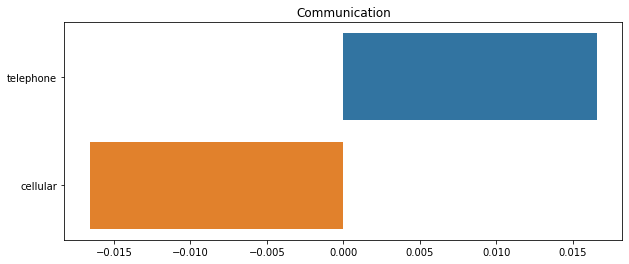

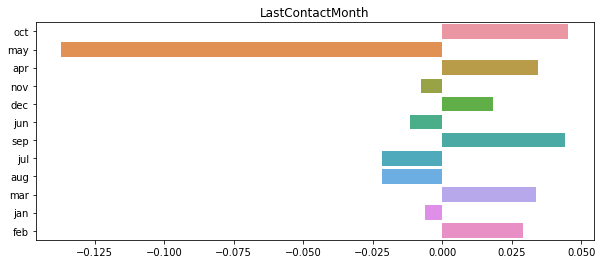

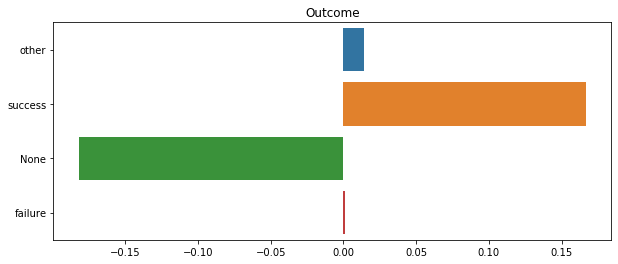

In [24]:
for i in cat_feat:
    plt.figure(figsize=(10,4))
    p_count=df.loc[df.CarInsurance .values==1,i].value_counts()
    n_count=df.loc[df.CarInsurance.values==0,i].value_counts()
    
    tot_counts=list(set(list(p_count.index)+list(n_count.index)))
    
    freq_pcount=(df.CarInsurance.values==1).sum()
    freq_ncount=(df.CarInsurance.values==0).sum()
    p_count=p_count.to_dict()
    n_count=n_count.to_dict()
    
    
    m_index=list(tot_counts)
    tot_counts=[p_count.get(k,0)/freq_pcount - n_count.get(k,0)/freq_ncount for k in tot_counts]
    sns.barplot(tot_counts,m_index)
    plt.tight_layout
    plt.title(i)

In [357]:
d=540/2396
c=219/1604
c-d

-0.0888419602079942

In [358]:
d

0.22537562604340566

In [359]:
pd.crosstab(df.Job,df.CarInsurance, margins=True)

CarInsurance,0,1,All
Job,,,
admin.,275,187,462
blue-collar,545,220,765
entrepreneur,87,35,122
housemaid,72,37,109
management,502,395,897
retired,103,147,250
self-employed,86,54,140
services,218,112,330
student,44,87,131


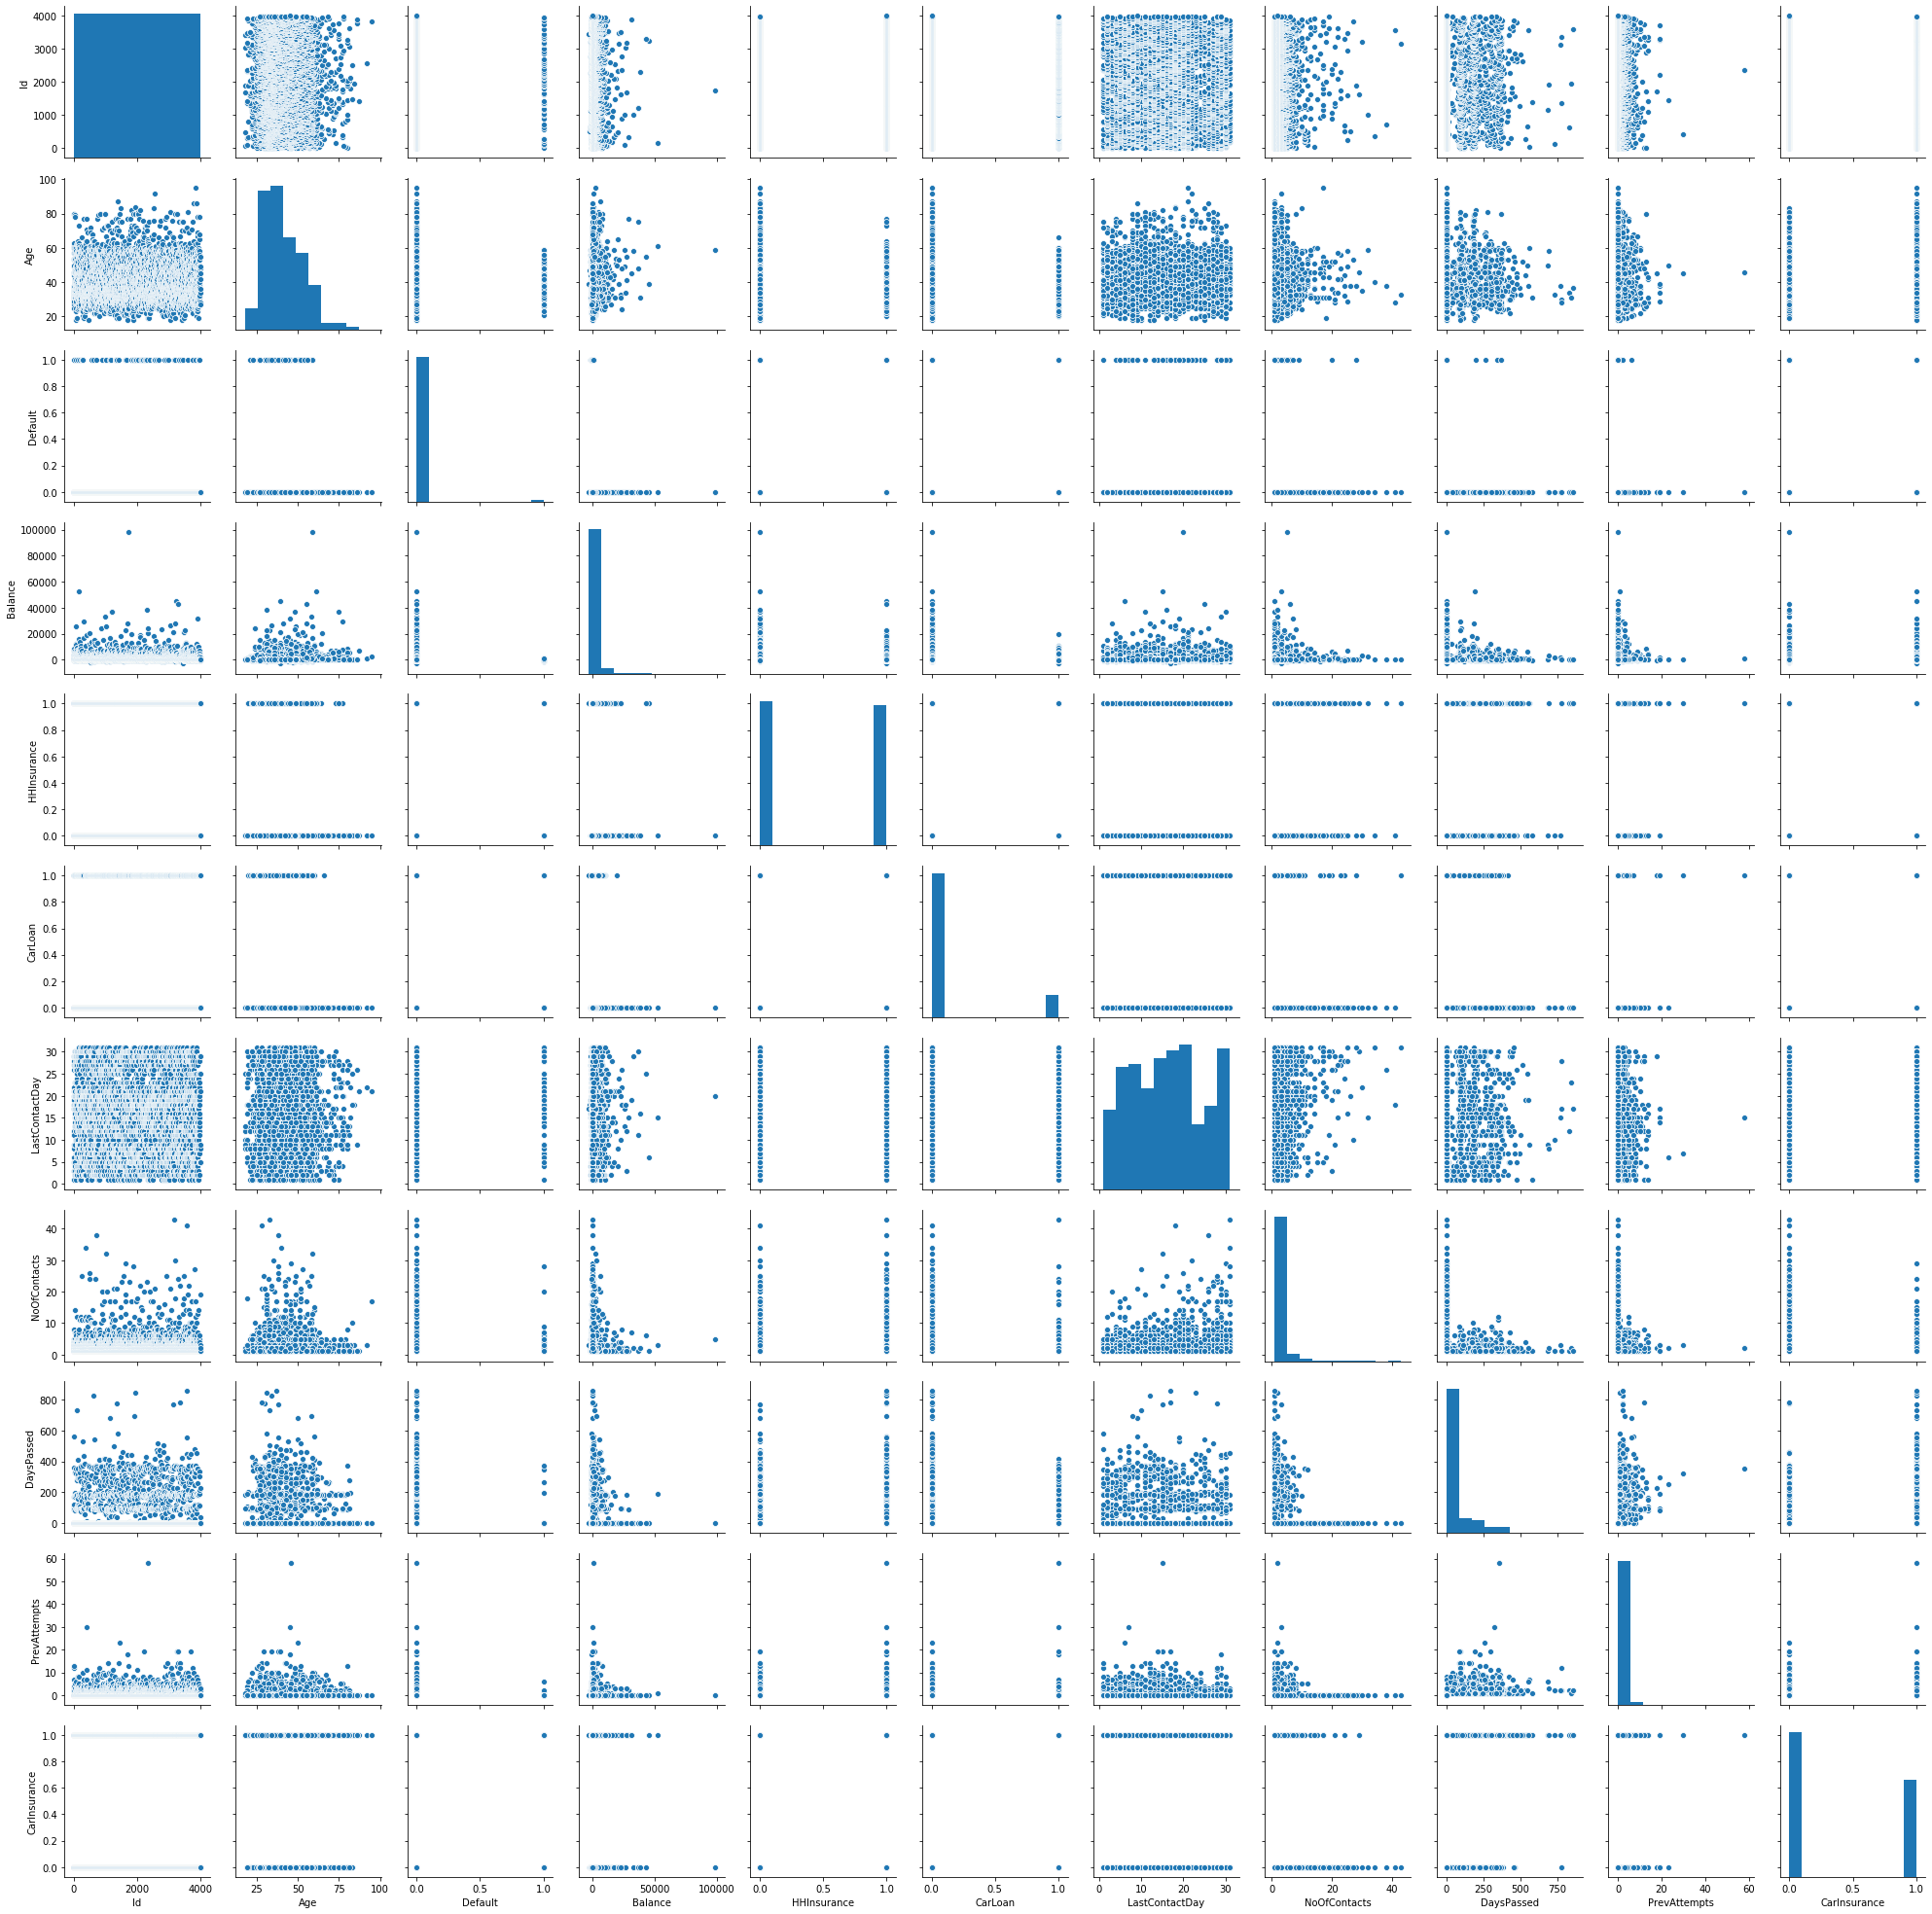

In [360]:
sns.pairplot(df)

In [361]:
#No Multicollinearity

In [362]:
cor=df.corr()

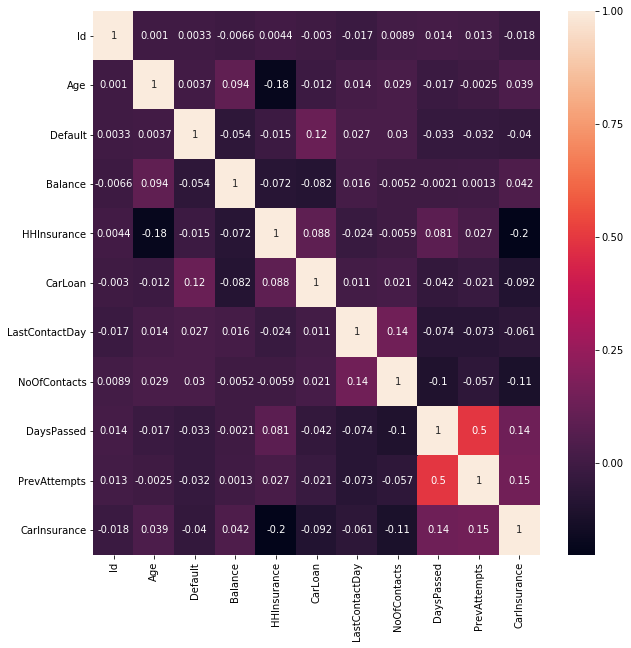

In [363]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)

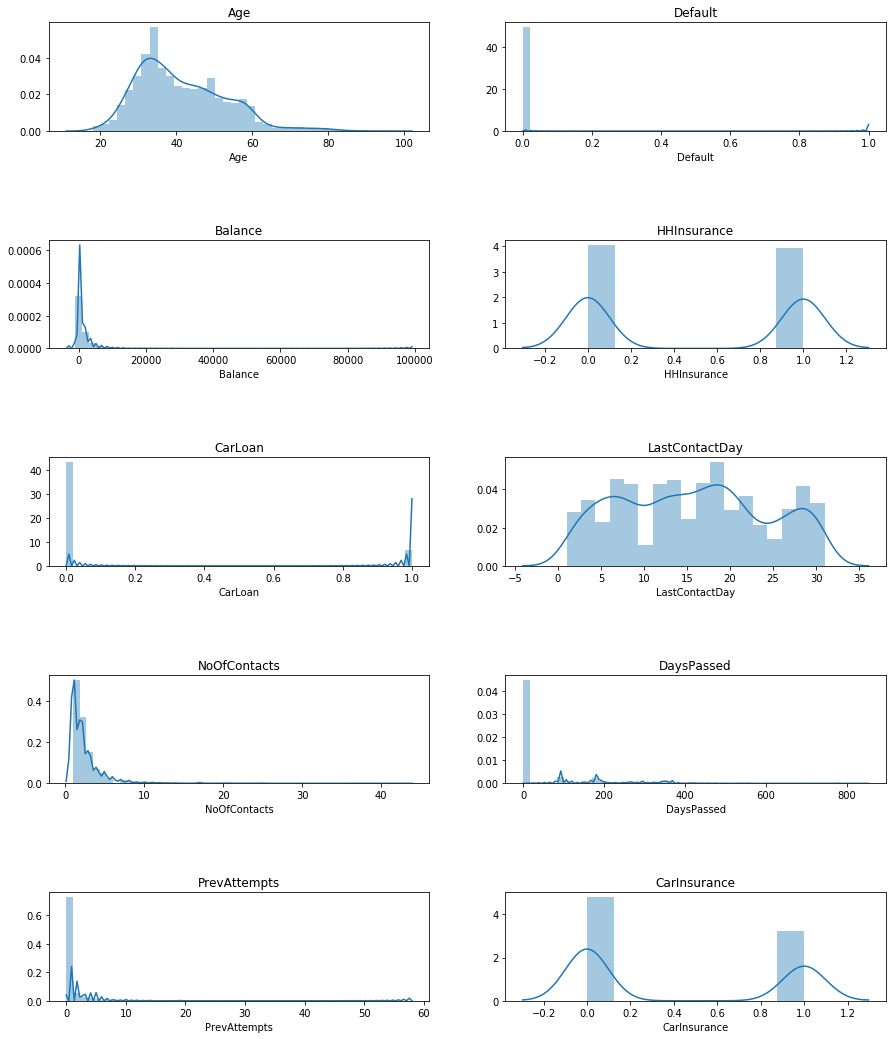

In [364]:
features=list(df.select_dtypes(exclude=['object','datetime64','timedelta64[ns]']))[1:]
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(df[j])
    plt.title(j)


In [365]:
df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CarInsurance         int32
dtype: object

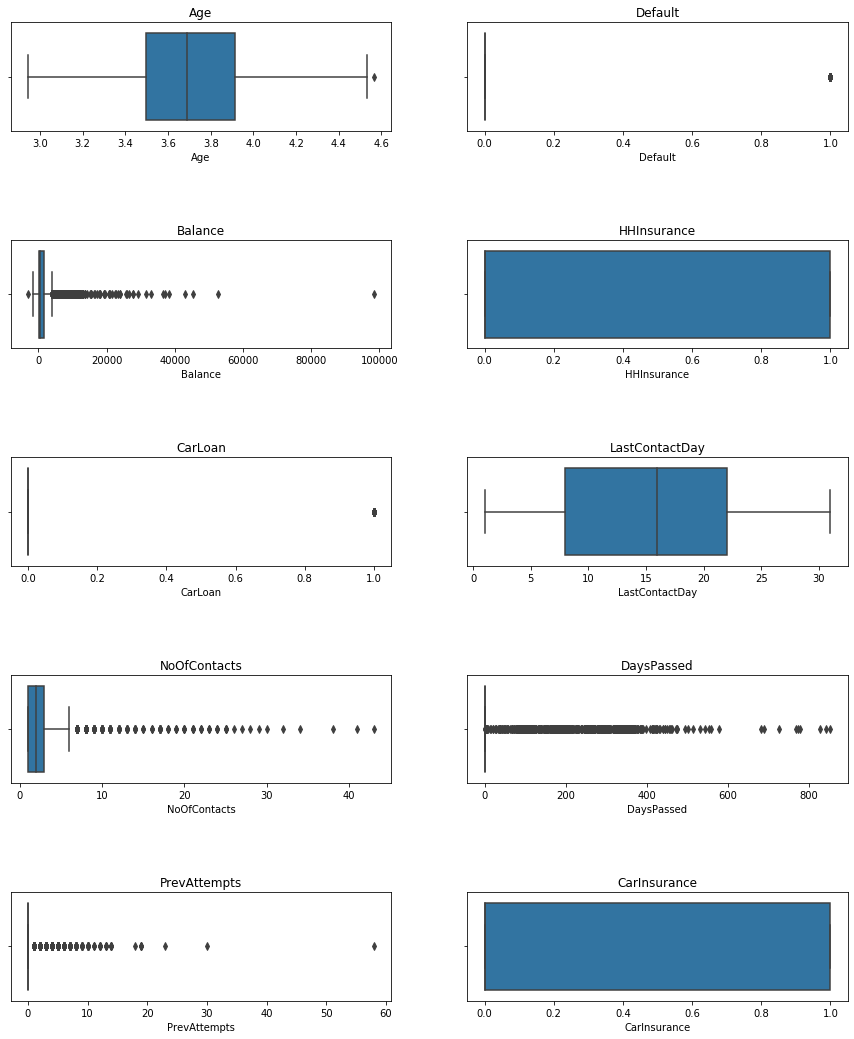

In [59]:
features=list(dfd.select_dtypes(exclude=['object','datetime64','timedelta64[ns]']))[1:]
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(dfd[j])
    plt.title(j)


In [367]:
#Outliers detection
def outliers(df,feat):
    ul={}
    ll={}
    perentage_of_outliers={}
    for i,j in enumerate(features):
        q1=df[j].quantile(0.25)
        q3=df[j].quantile(0.75)
        iqr=q3-q1
        ul[j]=q3+1.5*(iqr)
        ll[j]=q1-1.5*(iqr)
        perentage_of_outliers[j]=len(df[df[j]>ul[j]])/df.shape[0]*100
    return perentage_of_outliers
#     return ul,ll
    


In [368]:
outliers(df,features)

{'Age': 1.3,
 'Default': 1.4500000000000002,
 'Balance': 9.55,
 'HHInsurance': 0.0,
 'CarLoan': 13.3,
 'LastContactDay': 0.0,
 'NoOfContacts': 5.575,
 'DaysPassed': 23.95,
 'PrevAttempts': 23.95,
 'CarInsurance': 0.0}

In [369]:
df_unremoved=df.copy()

In [370]:
Q1 = df.quantile(0.25)
#calculate the third quartile
Q3 = df.quantile(0.75)
# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

Id                1999.5
Age                 17.0
Default              0.0
Balance           1508.0
HHInsurance          1.0
CarLoan              0.0
LastContactDay      14.0
NoOfContacts         2.0
DaysPassed           0.0
PrevAttempts         0.0
CarInsurance         1.0
dtype: float64


In [371]:
from sklearn import preprocessing


In [372]:
# Statistical Testing

In [373]:
X=df.drop('CarInsurance', axis=1)
y=df.CarInsurance

In [374]:
def signinficance(df,X,y,name_of_target_variable):
    import scipy.stats as stats
    from statsmodels.formula.api import ols
    from pandas.api.types import is_string_dtype
    from pandas.api.types import is_datetime64_dtype
    from pandas.api.types import is_float_dtype
    from pandas.api.types import is_int64_dtype
    sig=[]
    non_sig=[]
    for i in X.columns:
        if is_datetime64_dtype(X[i]):
            continue
        if is_string_dtype(X[i]):
            tab=pd.crosstab(X[i],y)
            (chisq, p_value, dof, exp) = stats.chi2_contingency(tab)
            if p_value>0.05:
                non_sig.append(i)
            else:
                sig.append(i)
        elif is_float_dtype(X[i]) or is_int64_dtype(X[i]):
            model = ols(f'{i}~{name_of_target_variable}', data = df).fit()
            aov = sm.stats.anova_lm(model, typ=2)
            if aov.iloc[0,3]>0.05:
                non_sig.append(i)
            else:
                sig.append(i)
    return sig,non_sig

            


    

In [375]:
sig, non_sig=signinficance(df,X,y,'CarInsurance')

In [376]:
sig

['Age',
 'Job',
 'Marital',
 'Education',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'Communication',
 'LastContactDay',
 'LastContactMonth',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Outcome']

In [377]:
non_sig

['Id']

In [378]:
label=df[['Marital','Education','Communication','LastContactMonth', 'Outcome']]

In [379]:
df_unlabeled=df.drop(['Marital','Education','Communication','LastContactMonth','Outcome'],axis=1)

In [380]:
label=label.apply(preprocessing.LabelEncoder().fit_transform)

In [381]:
New_df=pd.concat([df_unlabeled,label], axis=1)

In [382]:
New_df.dtypes

Id                   int64
Age                  int64
Job                 object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
LastContactDay       int64
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
CarInsurance         int32
Marital              int32
Education            int32
Communication        int32
LastContactMonth     int32
Outcome              int32
dtype: object

In [383]:
from sklearn.preprocessing import OneHotEncoder

In [384]:
enc = preprocessing.OneHotEncoder()
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CarInsurance'],
      dtype='object')

In [385]:
oneHot=df[['Job']]
New_df=New_df.drop('Job',axis=1)

In [386]:
enc.fit(oneHot)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [387]:
oneHot_label=enc.transform(oneHot).toarray()

In [388]:
val=set(list(df.Job))

In [389]:
one_hot_=pd.DataFrame(oneHot_label,columns=val)

In [390]:
New_df=pd.concat([New_df,one_hot_], axis=1)

In [391]:
New_df.LastContactMonth

0       4
1       8
2       6
3       8
4       6
       ..
3995    8
3996    5
3997    5
3998    4
3999    8
Name: LastContactMonth, Length: 4000, dtype: int32

In [392]:
from sklearn.linear_model import LogisticRegression

In [512]:
log=LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [394]:
from sklearn.model_selection import train_test_split
X=New_df.drop('CarInsurance', axis=1)
y=New_df.CarInsurance

In [395]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33, random_state=42)

In [396]:
cust_id_train=xtrain['Id']

In [397]:
xtrain.drop('Id', axis=1, inplace=True)


In [398]:
cust_id_test=xtest['Id']

In [399]:
xtest.drop('Id', axis=1, inplace=True)


In [400]:
log.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [401]:
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score,classification_report

In [402]:
# Logistic Regression

In [403]:
log_pred=log.predict(xtest)

In [404]:
log_score=log.score(xtrain,ytrain)

In [405]:
log_test_score=accuracy_score(ytest,log_pred)

In [406]:
log_score

0.6574626865671642

In [407]:
recall_score(ytest,log_pred)

0.3093385214007782

In [408]:
precision_score(ytest,log_pred)

0.6235294117647059

In [409]:
# DecisionTree

In [410]:
from sklearn.tree import DecisionTreeClassifier

In [411]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [412]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [413]:
dt_train_score=dt.score(xtrain,ytrain)

In [414]:
dt_pred=dt.predict(xtest)

In [415]:
dt_test=accuracy_score(ytest,dt_pred)

In [416]:
recall_score(ytest,dt_pred)

0.321011673151751

In [417]:
precision_score(ytest,dt_pred)

0.746606334841629

In [418]:
# RandomForest

In [419]:
from sklearn.ensemble import RandomForestClassifier

In [513]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [421]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [422]:
rf_base_train_score=rf.score(xtrain,ytrain)

In [423]:
rf_pred=rf.predict(xtest)

In [424]:
rf_base_test_score=accuracy_score(ytest,rf_pred)

In [425]:
# Feature Engineering

In [426]:
s = {}
for i in main_df['LastContactDay']:
    if i in range (0,11):
        s.setdefault(i,'Start of month')
    elif i in range (11,21):
        s.setdefault(i,'Middle of month')
    elif i in range (21,32):
        s.setdefault(i,'End of month')

In [427]:
main_df['Last_Contact_phase'] = main_df['LastContactDay'].map(s)

In [428]:
df_eng=main_df.drop('LastContactDay', axis=1)

In [429]:
main_df['Call_duration'] = main_df['CallEnd']-main_df['CallStart']

In [430]:
main_df.dtypes

Id                              int64
Age                             int64
Job                            object
Marital                        object
Education                      object
Default                         int64
Balance                         int64
HHInsurance                     int64
CarLoan                         int64
Communication                  object
LastContactDay                  int64
LastContactMonth               object
NoOfContacts                    int64
DaysPassed                      int64
PrevAttempts                    int64
Outcome                        object
CallStart              datetime64[ns]
CallEnd                datetime64[ns]
CarInsurance                    int32
Last_Contact_phase             object
Call_duration         timedelta64[ns]
dtype: object

In [431]:
r=main_df['Call_duration'].median()

In [432]:
e = {}
for i in main_df['Call_duration']:
    if i < r:
        e.setdefault(i,'Duration less than median duration')
    else:
        e.setdefault(i,'Duration greater than median duration')





main_df['Call_duration'] = main_df['Call_duration'].map(e)

In [433]:
main_df.drop(['CallStart','CallEnd'], axis=1,inplace=True)

In [434]:
main_df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Last_Contact_phase,Call_duration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,None,0,End of month,Duration less than median duration
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,None,0,End of month,Duration less than median duration
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,1,Start of month,Duration greater than median duration
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,None,1,Middle of month,Duration greater than median duration
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,None,0,Start of month,Duration less than median duration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,1,End of month,Duration greater than median duration
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,None,0,End of month,Duration less than median duration
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,None,0,Start of month,Duration greater than median duration
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,0,End of month,Duration less than median duration


In [435]:
l=pd.crosstab(index=main_df['LastContactMonth'],columns=main_df['CarInsurance'])
l['Percent_of_enrolled vs LastContactMonth'] = round((l[1]/(l[0]+l[1]))*100,2)
l=l.sort_values(by='Percent_of_enrolled vs LastContactMonth')
s = {}
a=list(l.index)
for i in a:
    s.setdefault(i,a.index(i))
main_df['LastContactMonth'] = main_df['LastContactMonth'].map(s)

In [436]:
c=pd.crosstab(index=main_df['Job'],columns=main_df['CarInsurance'])
c['Percent_of_enrolled vs Job'] = round((c[1]/(c[0]+c[1]))*100,2)
c=c.sort_values(by='Percent_of_enrolled vs Job')


In [437]:
m={}
a=list(c.index)
for i in a:
    m[i]=a.index(i)
main_df['Job']=main_df['Job'].map(m)

In [438]:
k=pd.crosstab(index=main_df['Call_duration'],columns=main_df['CarInsurance'])
k['Percent_of_enrolled vs Call_duration'] = round((k[1]/(k[0]+k[1]))*100,2)
k=k.sort_values(by='Percent_of_enrolled vs Call_duration')
o = {}
a=list(k.index)
for i in a:
    o.setdefault(i,a.index(i))
main_df['Call_duration'] = main_df['Call_duration'].map(o)

In [439]:
df3=main_df.copy()

In [440]:
df_dummies=pd.get_dummies(data=main_df, columns=['Marital','Education','Communication','Outcome','Last_Contact_phase'], drop_first=True)

In [441]:
X=df_dummies.drop('CarInsurance',axis=1)
y=df_dummies.CarInsurance

In [442]:
xtrain,xtest, ytrain,ytest=train_test_split(X,y, test_size=0.33, random_state=42)

In [443]:
train_cus=xtrain.Id
test_cus=xtest.Id

In [444]:
xtrain.drop('Id',axis=1,inplace=True)
xtest.drop('Id',axis=1,inplace=True)


In [519]:
log.fit(xtrain,ytrain)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [520]:
eng_score_log=log.score(xtrain,ytrain)

In [521]:
eng_predict_log=log.predict(xtest)

In [522]:
eng_score_log_test=accuracy_score(ytest,eng_predict_log)

In [523]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [524]:
dt_eng_score=dt.score(xtrain,ytrain)

In [525]:
dt_eng_score

0.7932835820895522

In [526]:
eng_predict_dt=dt.predict(xtest)

In [527]:
eng_score_dt_test=accuracy_score(ytest,eng_predict_dt)

In [528]:
eng_score_dt_test

0.7303030303030303

In [529]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [530]:
rf_train_eng_score=rf.score(xtrain,ytrain)

In [531]:
eng_predict_rf=rf.predict(xtest)

In [532]:
eng_score_rf_test=accuracy_score(ytest,eng_predict_rf)

In [533]:
eng_score_rf_test

0.7393939393939394

In [534]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [535]:
scoresdt = cross_val_score(dt, xtrain, ytrain, cv=10)

In [536]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20],
              "max_depth": [3, 5, 10, 20],
              "min_samples_leaf": [30, 100, 300],
              "max_leaf_nodes": [None,2,3,5],
              }

In [537]:
search=GridSearchCV(dt,param_grid,cv=10)

In [538]:
search.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=30,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
               

In [539]:
search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 30,
 'min_samples_split': 10}

In [540]:
dt=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 10,
 max_leaf_nodes= None,
 min_samples_leaf= 30,
 min_samples_split= 10)

In [541]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [542]:
train_score_dt_eng=dt.score(xtrain,ytrain)

In [543]:
train_score_dt_eng

0.7932835820895522

In [544]:
dt_best_pred=dt.predict(xtest)

In [545]:
test_score_dt_eng=accuracy_score(ytest,dt_best_pred)

In [546]:
test_score_dt_eng

0.7303030303030303

In [473]:
from sklearn.ensemble import AdaBoostClassifier


In [474]:
classifier=AdaBoostClassifier(DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 10,
 max_leaf_nodes= None,
 min_samples_leaf= 30,
 min_samples_split= 10), n_estimators=200)

In [475]:
classifier.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=30,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [476]:
ada_boost_train_score=classifier.score(xtrain,ytrain)

In [477]:
ada_boost_pred=classifier.predict(xtest)

In [478]:
ada_boost_test_score=accuracy_score(ytest,ada_boost_pred)

In [479]:
from sklearn.ensemble import GradientBoostingClassifier

In [480]:
lr=[0.05,0.075,0.1,0.25,0.5,0.75,1]

In [481]:
for i in lr:
    gb=GradientBoostingClassifier(n_estimators=20, learning_rate=i,max_features=2, max_depth=2,random_state=0)
    gb.fit(xtrain,ytrain)
    print('learning rate', i)
    print('accuracy_score(Training:{0:.3f}'.format(gb.score(xtrain,ytrain)))
    print('accuracy_score(Validation:{0:.3f}'.format(gb.score(xtest,ytest)))    

learning rate 0.05
accuracy_score(Training:0.666
accuracy_score(Validation:0.674
learning rate 0.075
accuracy_score(Training:0.690
accuracy_score(Validation:0.688
learning rate 0.1
accuracy_score(Training:0.706
accuracy_score(Validation:0.698
learning rate 0.25
accuracy_score(Training:0.754
accuracy_score(Validation:0.730
learning rate 0.5
accuracy_score(Training:0.760
accuracy_score(Validation:0.736
learning rate 0.75
accuracy_score(Training:0.771
accuracy_score(Validation:0.727
learning rate 1
accuracy_score(Training:0.771
accuracy_score(Validation:0.741


In [482]:
gb=GradientBoostingClassifier(n_estimators=20, learning_rate=1,max_features=2, max_depth=2,random_state=0)

gb.fit(xtrain,ytrain)


print('accuracy_score(Training:{0:.3f})'.format(gb.score(xtrain,ytrain)))
print('accuracy_score(Validation:{0:.3f})'.format(gb.score(xtest,ytest)))

accuracy_score(Training:0.771)
accuracy_score(Validation:0.741)


In [483]:
gb_train_score=gb.score(xtrain,ytrain)

In [484]:
gr_pred=gb.predict(xtest)

In [485]:
gb_test_score=accuracy_score(ytest,gr_pred)

In [486]:
model=pd.Series(['Logistic_basemodel','DecisionTree_basemodel','Random_Forest_basemodel','Logistic_Feature_Engineered','DecisionTree_Feature_Engineered'\
                ,'Random_Forest_Feature_Engineered','AdaBoost_Feature_Engineered','GradientBoost_Feature_Engineered'],name='Model')

In [487]:
model=pd.DataFrame(model)

In [488]:
model

,Model
0,Logistic_basemodel
1,DecisionTree_basemodel
2,Random_Forest_basemodel
3,Logistic_Feature_Engineered
4,DecisionTree_Feature_Engineered
5,Random_Forest_Feature_Engineered
6,AdaBoost_Feature_Engineered
7,GradientBoost_Feature_Engineered


In [489]:
Train_Score=pd.Series([log_score,dt_train_score,rf_base_train_score,eng_score_log,dt_eng_score,rf_train_eng_score,\
                      ada_boost_train_score,gb_train_score],name='Train_Score')

In [490]:
Test_score=pd.Series([log_test_score,dt_test,rf_base_test_score,eng_score_log_test,eng_score_dt_test,eng_score_rf_test,\
                    ada_boost_test_score,gb_test_score],name='Test_score')

In [491]:
Train_Score=pd.DataFrame(Train_Score)
Test_score=pd.DataFrame(Test_score)

In [494]:
Result=pd.concat([model,Train_Score,Test_score], axis=1)

In [495]:
Result.reset_index

<bound method DataFrame.reset_index of                               Model  Train_Score  Test_score
0                Logistic_basemodel     0.657463    0.658333
1            DecisionTree_basemodel     0.709701    0.693182
2           Random_Forest_basemodel     1.000000    0.706061
3       Logistic_Feature_Engineered     0.719776    0.715152
4   DecisionTree_Feature_Engineered     0.762687    0.734848
5  Random_Forest_Feature_Engineered     1.000000    0.743939
6       AdaBoost_Feature_Engineered     1.000000    0.721212
7  GradientBoost_Feature_Engineered     0.770896    0.740909>

In [496]:
Result

,Model,Train_Score,Test_score
0,Logistic_basemodel,0.657463,0.658333
1,DecisionTree_basemodel,0.709701,0.693182
2,Random_Forest_basemodel,1.000000,0.706061
3,Logistic_Feature_Engineered,0.719776,0.715152
4,DecisionTree_Feature_Engineered,0.762687,0.734848
5,Random_Forest_Feature_Engineered,1.000000,0.743939
6,AdaBoost_Feature_Engineered,1.000000,0.721212
7,GradientBoost_Feature_Engineered,0.770896,0.740909


In [498]:
# Create a cross validation function 
def get_best_model(estimator, params_grid={}):
    model = GridSearchCV(estimator = estimator,param_grid = params_grid,cv=10, scoring="accuracy", n_jobs= -1)
    model.fit(xtrain,ytrain)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model


In [507]:
def model_fit(model,feature_imp=True,cv=5):
    # model fit   
    clf = model.fit(xtrain,ytrain)
    # model prediction     
    ypred = clf.predict(xtest)
    # model report     
    cm = confusion_matrix(ytest,ypred)
#     plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')
    print('\n--- Train Set -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,xtrain,ytrain,cv=cv)),np.std(cross_val_score(clf,xtrain,ytrain,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,xtrain,ytrain,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,xtrain,ytrain,cv=cv,scoring='roc_auc'))))
    print('\n--- Validation Set -----------------------------')    
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,xtest,ytest,cv=cv)),np.std(cross_val_score(clf,xtest,ytest,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,xtest,ytest,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,xtest,ytest,cv=cv,scoring='roc_auc'))))
    print('-----------------------------------------------') 
    # feature importance 
    if feature_imp:
        feat_imp = pd.Series(clf.feature_importances_,index=all_data.columns)
        feat_imp = feat_imp.nlargest(15).sort_values()
        plt.figure()
        feat_imp.plot(kind="barh",figsize=(6,8),title="Most Important Features")

In [505]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier

In [508]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
parameters={'n_estimators':[900,1000,1100],
            'learning_rate':[0.01],
            'max_depth':[8],
            'min_child_weight':[1],
            'subsample':[0.8],
            'colsample_bytree':[0.3,0.4,0.5]}
clf_xgb= get_best_model(xgb,parameters)
# model_fit(model=clf_xgb, feature_imp=True)


--- Best Parameters -----------------------------
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 900, 'subsample': 0.8}

--- Best Model -----------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)


In [509]:
rf = RandomForestClassifier(random_state=3)
parameters={'n_estimators':[100],
            'max_depth':[10],
            'max_features':[13,14],
            'min_samples_split':[11]}
clf_rf= get_best_model(rf,parameters)
# model_fit(model=clf_rf, feature_imp=True)


--- Best Parameters -----------------------------
{'max_depth': 10, 'max_features': 14, 'min_samples_split': 11, 'n_estimators': 100}

--- Best Model -----------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)


In [510]:
lg = LogisticRegression(random_state=3)
parameters = {'C':[0.8,0.9,1], 
              'penalty':['l1','l2']}
clf_lg = get_best_model(lg,parameters)
# model_fit(model=clf_lg, feature_imp=False)


--- Best Parameters -----------------------------
{'C': 0.8, 'penalty': 'l2'}

--- Best Model -----------------------------
LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [517]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [516]:
from xgboost import XGBClassifier


In [518]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
clf_vc = VotingClassifier(estimators=[('xgb', clf_xgb),                                       
                                      ('rf', clf_rf),
                                      ('lg', clf_lg),],
                                     
                          voting='hard',
                          weights=[4,4,1])
clf_vc = clf_vc.fit(xtrain, ytrain)

In [550]:
clf_vc.score(xtrain, ytrain)

0.9298507462686567

In [551]:
pred_voting_clas=clf_vc.predict(xtest)

In [552]:
accuracy_score(ytest,pred_voting_clas)

0.7454545454545455